<a href="https://colab.research.google.com/github/pumpzcc/EvolutionaryDeepLearning/blob/main/EDL_10_4_NEAT_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/CodeReclaimers/neat-python.git

  Cloning https://github.com/CodeReclaimers/neat-python.git to /tmp/pip-req-build-mew_5oap
  Running command git clone --filter=blob:none --quiet https://github.com/CodeReclaimers/neat-python.git /tmp/pip-req-build-mew_5oap
  Resolved https://github.com/CodeReclaimers/neat-python.git to commit 37bc8bb73fd6153a115001c2646f9f02bac3ad81
  Preparing metadata (setup.py) ... done
  Created wheel for neat-python: filename=neat_python-0.93-py3-none-any.whl size=43564 sha256=1f4f2259a0655eb07600ea28f0ef21ee2f549b92a6d35fbe5642141e5c00a241
  Stored in directory: /tmp/pip-ephem-wheel-cache-hg9zh1iv/wheels/23/a6/01/2c242e0ffec7801c7797caa13adc15a3361854465e28375261
Successfully built neat-python


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import random

import neat

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5


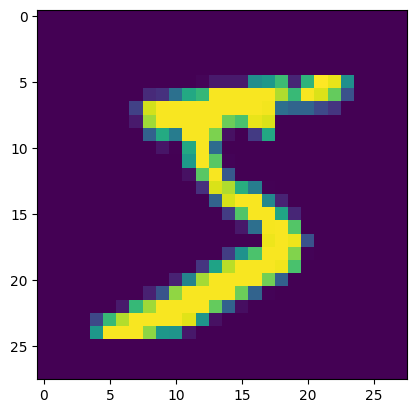

In [3]:
#@title Dataset Parameters  { run: "auto" }
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
X, Y = x_train / 255.0, y_train

plt.imshow(X[0])
print(Y[0])

In [4]:
%%writefile config
[NEAT]
fitness_criterion     = max
fitness_threshold     = .25
pop_size              = 100
reset_on_extinction   = 1

[DefaultGenome]
num_inputs              = 784
num_hidden              = 10
num_outputs             = 10
initial_connection      = full_direct
feed_forward            = True
compatibility_disjoint_coefficient    = 1.0
compatibility_weight_coefficient      = 0.6
conn_add_prob           = 0.2
conn_delete_prob        = 0.2
node_add_prob           = 0.2
node_delete_prob        = 0.2
activation_default      = relu
activation_options      = identity relu
activation_mutate_rate  = 0.0
aggregation_default     = sum
aggregation_options     = sum mean product min max median
aggregation_mutate_rate = 0.2
bias_init_mean          = 0.0
bias_init_stdev         = 1.0
bias_replace_rate       = 0.1
bias_mutate_rate        = 0.7
bias_mutate_power       = 0.5
bias_max_value          = 30.0
bias_min_value          = -30.0
response_init_mean      = 1.0
response_init_stdev     = 0.0
response_replace_rate   = 0.0
response_mutate_rate    = 0.0
response_mutate_power   = 0.0
response_max_value      = 30.0
response_min_value      = -30.0

weight_max_value        = 30
weight_min_value        = -30
weight_init_mean        = 0.0
weight_init_stdev       = 1.0
weight_mutate_rate      = 0.8
weight_replace_rate     = 0.1
weight_mutate_power     = 0.5
enabled_default         = True
enabled_mutate_rate     = 0.01

[DefaultSpeciesSet]
compatibility_threshold = 3.0

[DefaultStagnation]
species_fitness_func = max
max_stagnation  = 20

[DefaultReproduction]
elitism            = 2
survival_threshold = 0.2

Writing config


In [5]:
# Load configuration.
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     'config')

print(config.genome_type, config.genome_config,config.pop_size)

<class 'neat.genome.DefaultGenome'> <neat.genome.DefaultGenomeConfig object at 0x7b9e2a7fa650> 100


In [6]:
key = "fred"
genome = config.genome_type(key)
genome.configure_new(config.genome_config)

net = neat.nn.FeedForwardNetwork.create(genome, config)

In [7]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

scores = [3.0, 1.0, 0.2]
print(softmax(scores))

[0.8360188  0.11314284 0.05083836]


In [8]:
from sklearn.metrics import balanced_accuracy_score

BATCH_SIZE = 256
idx = np.random.randint(0, X.shape[0], BATCH_SIZE)
xs, ys = X[idx], Y[idx]

yis = []
for x, y in zip(xs,ys):
  x = np.reshape(x, (784,))
  output = net.activate(x)
  class_ = softmax(output)
  yis.append(np.argmax(class_))
print(ys, yis)
fitness = balanced_accuracy_score(ys, yis)
print(fitness)

[1 1 3 8 3 4 3 0 8 3 5 7 7 7 8 0 6 3 7 9 7 0 8 9 2 8 2 2 8 3 4 3 9 4 2 0 9
 3 0 6 7 1 5 5 9 9 5 5 3 1 4 6 8 4 0 5 4 0 0 2 6 6 3 1 5 3 2 8 4 3 2 7 8 2
 6 1 2 9 4 3 1 2 9 5 4 8 1 0 2 7 3 4 4 5 5 1 7 2 2 6 8 9 5 8 8 1 1 8 4 0 6
 5 3 5 1 1 3 9 1 1 1 6 2 1 2 9 5 8 9 3 4 7 2 7 1 2 2 8 1 7 0 5 8 1 1 1 6 5
 6 9 5 5 1 7 5 8 5 1 1 7 3 3 8 4 1 0 0 1 3 5 6 0 3 5 2 1 1 8 2 6 1 8 2 9 1
 7 1 7 1 3 2 3 8 1 4 2 0 4 8 9 1 2 8 7 6 3 6 1 8 7 3 4 2 6 2 1 8 7 2 1 3 4
 1 7 2 7 8 3 6 8 5 0 2 8 9 1 0 6 0 0 0 5 9 7 2 2 4 7 7 8 0 3 0 8 3 9] [np.int64(2), np.int64(3), np.int64(2), np.int64(8), np.int64(1), np.int64(2), np.int64(2), np.int64(8), np.int64(2), np.int64(3), np.int64(8), np.int64(8), np.int64(3), np.int64(1), np.int64(8), np.int64(5), np.int64(1), np.int64(2), np.int64(8), np.int64(3), np.int64(3), np.int64(5), np.int64(2), np.int64(8), np.int64(8), np.int64(2), np.int64(1), np.int64(1), np.int64(1), np.int64(8), np.int64(3), np.int64(1), np.int64(2), np.int64(1), np.int64(3), np.int64(8), np.int64(1)

In [9]:
def eval_genomes(genomes, config):
  for genome_id, genome in genomes:
    idx = np.random.randint(0, X.shape[0], BATCH_SIZE)
    xs, ys = X[idx], Y[idx]
    net = neat.nn.FeedForwardNetwork.create(genome, config)
    score = 0
    yis = []
    for x, y in zip(xs,ys):
      x = np.reshape(x, (784,))
      output = net.activate(x)
      output = softmax(output)
      class_ = np.argmax(output)
      yis.append(class_)
    genome.fitness = fitness = balanced_accuracy_score(ys, yis)

In [10]:
# Create the population, which is the top-level object for a NEAT run.
p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(False))

# Run until a solution is found.
winner = p.run(eval_genomes)

# Display the winning genome.
print('\nBest genome:\n{!s}'.format(winner))

# Show output of the most fit genome against training data.
print('\nOutput:')
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)

Streaming output truncated to the last 5000 lines.
	DefaultConnectionGene(key=(-259, 66), weight=-2.511060678307289, enabled=True)
	DefaultConnectionGene(key=(-259, 67), weight=1.3854826860162373, enabled=True)
	DefaultConnectionGene(key=(-259, 68), weight=2.178037538351068, enabled=True)
	DefaultConnectionGene(key=(-259, 69), weight=0.6593247076842828, enabled=True)
	DefaultConnectionGene(key=(-258, 0), weight=-0.11244283604985222, enabled=True)
	DefaultConnectionGene(key=(-258, 1), weight=2.2969795287411188, enabled=True)
	DefaultConnectionGene(key=(-258, 2), weight=1.6431359147991529, enabled=True)
	DefaultConnectionGene(key=(-258, 3), weight=0.3731237134493833, enabled=True)
	DefaultConnectionGene(key=(-258, 4), weight=-1.2799506820832525, enabled=True)
	DefaultConnectionGene(key=(-258, 5), weight=-2.7509958725905674, enabled=True)
	DefaultConnectionGene(key=(-258, 6), weight=-0.8455962352600267, enabled=True)
	DefaultConnectionGene(key=(-258, 7), weight=-0.22881166752954996, enabl

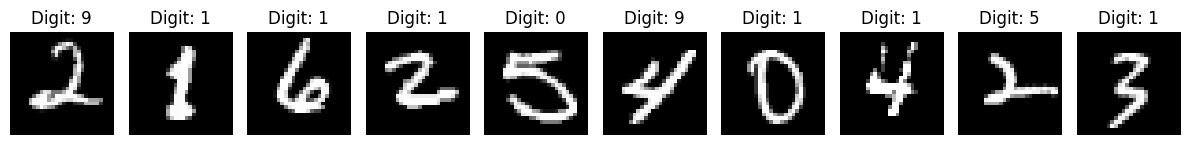

In [11]:
#@title Plot Helper Functions
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)

def plot_classify(n_ex=10, dim=(1, 10), figsize=(12, 2)):
  idx = np.random.randint(0, X.shape[0], BATCH_SIZE)
  xs, ys = X[idx], Y[idx]
  plt.figure(figsize=figsize)
  for i in range(n_ex):
    x = np.reshape(xs[i], (784,))
    predict = winner_net.activate(x)
    predict = np.argmax(predict)
    plt.subplot(dim[0], dim[1], i+1)
    plt.title("Digit: %d" % predict)
    plt.imshow((1-xs[i])*255, interpolation='nearest', cmap='gray_r')
    plt.axis('off')
  plt.tight_layout()
  plt.show()

plot_classify()

In [12]:
#@title Draw Network from Genome
import graphviz

def draw_net(config, genome, view=False, filename=None, node_names=None, show_disabled=True, prune_unused=False,
             node_colors=None, fmt='svg'):
    """ Receives a genome and draws a neural network with arbitrary topology. """
    # Attributes for network nodes.
    if graphviz is None:
        print("This display is not available due to a missing optional dependency (graphviz)")
        return

    # If requested, use a copy of the genome which omits all components that won't affect the output.
    if prune_unused:
        genome = genome.get_pruned_copy(config.genome_config)

    if node_names is None:
        node_names = {}

    assert type(node_names) is dict

    if node_colors is None:
        node_colors = {}

    assert type(node_colors) is dict

    node_attrs = {
        'shape': 'circle',
        'fontsize': '9',
        'height': '0.2',
        'width': '0.2'}

    dot = graphviz.Digraph(format=fmt, node_attr=node_attrs)

    inputs = set()
    for k in config.genome_config.input_keys:
        inputs.add(k)
        name = node_names.get(k, str(k))
        input_attrs = {'style': 'filled', 'shape': 'box', 'fillcolor': node_colors.get(k, 'lightgray')}
        dot.node(name, _attributes=input_attrs)

    outputs = set()
    for k in config.genome_config.output_keys:
        outputs.add(k)
        name = node_names.get(k, str(k))
        node_attrs = {'style': 'filled', 'fillcolor': node_colors.get(k, 'lightblue')}

        dot.node(name, _attributes=node_attrs)

    used_nodes = set(genome.nodes.keys())
    for n in used_nodes:
        if n in inputs or n in outputs:
            continue

        attrs = {'style': 'filled',
                 'fillcolor': node_colors.get(n, 'white')}
        dot.node(str(n), _attributes=attrs)

    for cg in genome.connections.values():
        if cg.enabled or show_disabled:
            # if cg.input not in used_nodes or cg.output not in used_nodes:
            #    continue
            print(cg.key)
            input, output = cg.key
            a = node_names.get(input, str(input))
            b = node_names.get(output, str(output))
            style = 'solid' if cg.enabled else 'dotted'
            color = 'green' if cg.weight > 0 else 'red'
            width = str(0.1 + abs(cg.weight / 5.0))
            dot.edge(a, b, _attributes={'style': style, 'color': color, 'penwidth': width})

    dot.render(filename, view=view)
    dot.view()

    return dot

node_names = {-1: 'X1', -2: 'X2', 0: 'Output'}
draw_net(config, winner, True, node_names=node_names, show_disabled=False)

Streaming output truncated to the last 5000 lines.
(-270, 9)
(-271, 0)
(-271, 1)
(-271, 2)
(-271, 3)
(-271, 4)
(-271, 5)
(-271, 6)
(-271, 7)
(-271, 8)
(-271, 9)
(-272, 0)
(-272, 1)
(-272, 2)
(-272, 3)
(-272, 4)
(-272, 5)
(-272, 6)
(-272, 7)
(-272, 8)
(-272, 9)
(-273, 0)
(-273, 1)
(-273, 2)
(-273, 3)
(-273, 4)
(-273, 5)
(-273, 6)
(-273, 7)
(-273, 8)
(-273, 9)
(-274, 0)
(-274, 1)
(-274, 2)
(-274, 3)
(-274, 4)
(-274, 5)
(-274, 6)
(-274, 7)
(-274, 8)
(-274, 9)
(-275, 0)
(-275, 1)
(-275, 2)
(-275, 3)
(-275, 4)
(-275, 5)
(-275, 6)
(-275, 7)
(-275, 8)
(-275, 9)
(-276, 1)
(-276, 2)
(-276, 3)
(-276, 4)
(-276, 5)
(-276, 6)
(-276, 7)
(-276, 8)
(-276, 9)
(-277, 0)
(-277, 1)
(-277, 2)
(-277, 3)
(-277, 4)
(-277, 5)
(-277, 6)
(-277, 7)
(-277, 8)
(-277, 9)
(-278, 0)
(-278, 1)
(-278, 2)
(-278, 3)
(-278, 4)
(-278, 5)
(-278, 6)
(-278, 7)
(-278, 8)
(-278, 9)
(-279, 0)
(-279, 1)
(-279, 2)
(-279, 3)
(-279, 4)
(-279, 5)
(-279, 6)
(-279, 7)
(-279, 8)
(-279, 9)
(-280, 0)
(-280, 2)
(-280, 3)
(-280, 4)
(-280, 5)